In [1]:
%load_ext autoreload

In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#from monetio.models import hysplit

In [3]:
from monetio.models import hysplit

In [4]:
from utilvolc import volcat
import utilvolc.ash_inverse as ai
from utilvolc import ashapp

In [5]:
from utilvolc.ashapp import ashinverse

In [6]:
os.chdir('/hysplit-users/alicec/projects/bezy/notebooks/')
projdir = os.getcwd().replace('notebooks','')
print(projdir)

vloc = [160.587,55.978]
tag ='C'
#ens = ['gep{:02d}'.format(x) for x in np.arange(1,31)]
#ens.append('gec00')
#ens=['gep04','gep03']

#----------------------------------------------------------------
# locations and names of netcdf files with cdump output.
tdir = os.path.join(projdir,'data')
fnamelist  = ['xrfile.invbezy{}.nc'.format(tag)]
tdirlist = [tdir]

#----------------------------------------------------------------
configdir = os.path.join(projdir,'RunC')
configfile = 'config.invbezy{}.txt'.format(tag)

#-----------------------------------------------------------------
# location of volcat files
vdir = os.path.join(projdir,'data','volcat')
# volcano id to locate
vid = 'v300250'
#-----------------------------------------------------------------
# Location of inverse algorithm output
#wpath = os.getcwd()
wdir = os.path.join(projdir,'RunC')
#print(wpath)
#cdir = '../Run{}/'.format(tag)
#wdir = '../Run{}/'.format(tag,tag)
#sdir = os.path.join(wdir,'RunM_1_2_3_4_TF')
name = 'out.dat'
name2 = 'out2.dat'
#------------------------------------------------------------------

# name to write emit-times file to.
emit_file_name = '{}emit_Run{}4.txt'.format(wdir,tag)
tcm_name_base = 'run{}zzz.tcm.txt'.format(tag)
figbase = 'Run{}4'.format(tag)

#-------------------------------------------------------------------
#

execdir = os.path.join(projdir,'Inverse_240')
hysplitdir = os.path.join(projdir,'hysplit')
#execdir = mdir+'/Inverse_'
print(execdir, hysplitdir)
print(vdir)
#

datadir = os.path.join(projdir, 'data')
print('projdir',projdir)
print(tdir)
print(tdirlist)

/hysplit-users/alicec/projects/bezy/
/hysplit-users/alicec/projects/bezy/Inverse_240 /hysplit-users/alicec/projects/bezy/hysplit
/hysplit-users/alicec/projects/bezy/data/volcat
projdir /hysplit-users/alicec/projects/bezy/
/hysplit-users/alicec/projects/bezy/data
['/hysplit-users/alicec/projects/bezy/data']


In [7]:
%autoreload
#time list to prepare.
# start with one hour after eruption. 21:00-22:00
dlist = []
sdate = datetime.datetime(2020,10,21,21,0)
#sdate = datetime.datetime(2020,10,22,12,0)
dt = datetime.timedelta(hours=1)
for iii in np.arange(0,10):
    drange = [sdate, sdate+dt]
    dlist.append(drange)
    sdate += dt
print(dlist[0])
print(dlist[-1])

[datetime.datetime(2020, 10, 21, 21, 0), datetime.datetime(2020, 10, 21, 22, 0)]
[datetime.datetime(2020, 10, 22, 6, 0), datetime.datetime(2020, 10, 22, 7, 0)]


In [8]:
# initiate the InverseAshEns object
%autoreload
inverse = ai.InverseAshEns(tdirlist,fnamelist,vdir,vid,configdir=configdir,configfile=configfile,verbose=False)

In [9]:
print(inverse.invlist[0].get_time(2))
print(inverse.invlist[0].get_time(4))

2020-10-21 21:00:00
2020-10-21 23:00:00


In [10]:
%autoreload
inverse.set_directory(wdir,execdir,datadir,hysplitdir)
inverse.print_directories()

Working directory, wdir :/hysplit-users/alicec/projects/bezy/RunC
execdir :/hysplit-users/alicec/projects/bezy/Inverse_240
hysplitdir :/hysplit-users/alicec/projects/bezy/hysplit
subdir :/hysplit-users/alicec/projects/bezy/RunC
vdir :/hysplit-users/alicec/projects/bezy/data/volcat
datadir :/hysplit-users/alicec/projects/bezy/data


In [11]:
inva = inverse.invlist[0]
inva.cdump.coords

Coordinates:
  * time       (time) datetime64[ns] 2020-10-21T19:00:00 ... 2020-10-22T11:00:00
  * z          (z) int64 1523 3047 4571 6095 7619 9143 10667 12191 13715 15239
  * y          (y) int64 369 370 371 372 373 374 375 ... 479 480 481 482 483 484
  * x          (x) int64 865 866 867 868 869 870 871 ... 954 955 956 957 958 959
  * ens        (ens) object '102119_2880' '102119_3880' ... '102200_12880'
    source     <U13 'Line to 13 km'
    latitude   (y, x) float64 ...
    longitude  (y, x) float64 ...

In [12]:
# add in the relavant VOLCAT observations
%autoreload
#dlist = [[datetime.datetime(2020,10,22,9),datetime.datetime(2020,10,22,10)]]
for drange in dlist:
    print(drange)
    inverse.prepare_one_time(drange,st='start')

[datetime.datetime(2020, 10, 21, 21, 0), datetime.datetime(2020, 10, 21, 22, 0)]
[datetime.datetime(2020, 10, 21, 22, 0), datetime.datetime(2020, 10, 21, 23, 0)]
[datetime.datetime(2020, 10, 21, 23, 0), datetime.datetime(2020, 10, 22, 0, 0)]
[datetime.datetime(2020, 10, 22, 0, 0), datetime.datetime(2020, 10, 22, 1, 0)]
[datetime.datetime(2020, 10, 22, 1, 0), datetime.datetime(2020, 10, 22, 2, 0)]
[datetime.datetime(2020, 10, 22, 2, 0), datetime.datetime(2020, 10, 22, 3, 0)]
[datetime.datetime(2020, 10, 22, 3, 0), datetime.datetime(2020, 10, 22, 4, 0)]
[datetime.datetime(2020, 10, 22, 4, 0), datetime.datetime(2020, 10, 22, 5, 0)]
[datetime.datetime(2020, 10, 22, 5, 0), datetime.datetime(2020, 10, 22, 6, 0)]
[datetime.datetime(2020, 10, 22, 6, 0), datetime.datetime(2020, 10, 22, 7, 0)]


Automatic Runs

In [13]:
def makerun(tii,remove_cols, remove_rows, remove_sources,remove_ncs):
    print("HERE HERE HERE")
    inverse.make_tcm_mult(tii,remove_cols=remove_cols, remove_rows=remove_rows, remove_sources=remove_sources,remove_ncs=remove_ncs)
    runtag = ai.create_runtag(tag,tii,remove_cols, remove_rows, remove_sources,remove_ncs=remove_ncs)
    inverse.set_subdirectory(runtag)
    print('HERE', inverse.subdir)
    tcmstr = inverse.write_tcm(os.path.join(inverse.subdir, tcm_name_base.replace('zzz','4')))
    inverse.run_tcm()
    
    eii=None
    unit='g/h'
    unit='kg/s'
    inverse.plot_outdat_ts(eii,unit=unit)
    #plt.show()
    #inverse.plot_outdat_ts(eii,profile=True)
    inverse.save_emis(runtag+'.csv')

here
tii [4, 5, 6]
HERE HERE HERE
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunC/RunC_4_5_6_TFw7


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1093: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this,

bezyC
length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunC/RunC_4_5_6_TFw7
saving emissions in  /hysplit-users/alicec/projects/bezy/RunC/RunC_4_5_6_TFw7/RunC_4_5_6_TFw7.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunC/RunC_4_5_6_TFw7/RunC_4_5_6_TFw7.csv


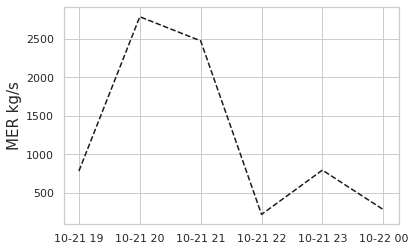

In [14]:
%autoreload
# creates emit-times, CONTROL and SETUP files for HYSPLIT runs.
# Note that warning that meteorological files not found is ok.

%autoreload
print('here')
tiilist = [[4,5,6]]
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=7
for tii in tiilist:
    print('tii', tii)
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
    #inverse.make_efile(vloc=vloc)
    #inverse.run_hysplit()

here
tii [2, 3]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_TFw7


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1093: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this,

bezyC
length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_TFw7
saving emissions in  /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_TFw7/RunC_2_3_TFw7.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_TFw7/RunC_2_3_TFw7.csv
tii [2, 3, 4]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_TFw7


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1093: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this,

bezyC


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:771: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1093: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different le

length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_TFw7
saving emissions in  /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_TFw7/RunC_2_3_4_TFw7.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_TFw7/RunC_2_3_4_TFw7.csv
tii [2, 3, 4, 5]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_TFw7
bezyC


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:771: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1093: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different le

length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_TFw7
saving emissions in  /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_TFw7/RunC_2_3_4_5_TFw7.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_TFw7/RunC_2_3_4_5_TFw7.csv
tii [2, 3, 4, 5, 6]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_TFw7
bezyC


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:771: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1093: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different le

length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_TFw7
saving emissions in  /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_TFw7/RunC_2_3_4_5_6_TFw7.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_TFw7/RunC_2_3_4_5_6_TFw7.csv
tii [2, 3, 4, 5, 6, 7]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_7_TFw7
bezyC


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:771: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1093: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different le

length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_7_TFw7
saving emissions in  /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_7_TFw7/RunC_2_3_4_5_6_7_TFw7.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_7_TFw7/RunC_2_3_4_5_6_7_TFw7.csv
tii [2, 3, 4, 5, 6, 7, 8]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_7_8_TFw7
bezyC


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:771: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1093: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different le

length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_7_8_TFw7
saving emissions in  /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_7_8_TFw7/RunC_2_3_4_5_6_7_8_TFw7.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_7_8_TFw7/RunC_2_3_4_5_6_7_8_TFw7.csv
tii [2, 3, 4, 5, 6, 7, 8, 9]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_7_8_9_TFw7
bezyC


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:771: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1093: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different le

length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_7_8_9_TFw7
saving emissions in  /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_7_8_9_TFw7/RunC_2_3_4_5_6_7_8_9_TFw7.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_7_8_9_TFw7/RunC_2_3_4_5_6_7_8_9_TFw7.csv
tii [2, 3, 4, 5, 6, 7, 8, 9, 10]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_7_8_9_10_TFw7
bezyC


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:771: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1093: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different le

length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_7_8_9_10_TFw7
saving emissions in  /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_7_8_9_10_TFw7/RunC_2_3_4_5_6_7_8_9_10_TFw7.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_7_8_9_10_TFw7/RunC_2_3_4_5_6_7_8_9_10_TFw7.csv
tii [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
2020-10-22T06:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_7_8_9_10_11_TFw7
bezyC


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:771: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1093: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different le

length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_7_8_9_10_11_TFw7
saving emissions in  /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_7_8_9_10_11_TFw7/RunC_2_3_4_5_6_7_8_9_10_11_TFw7.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_4_5_6_7_8_9_10_11_TFw7/RunC_2_3_4_5_6_7_8_9_10_11_TFw7.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_TFw7
bezyC


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:771: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1093: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different le

length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_TFw7
saving emissions in  /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_TFw7/RunC_2_3_TFw7.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_TFw7/RunC_2_3_TFw7.csv
HERE HERE HERE
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunC/RunC_3_4_TFw7
bezyC


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:771: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1093: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different le

length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunC/RunC_3_4_TFw7
saving emissions in  /hysplit-users/alicec/projects/bezy/RunC/RunC_3_4_TFw7/RunC_3_4_TFw7.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunC/RunC_3_4_TFw7/RunC_3_4_TFw7.csv
HERE HERE HERE
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunC/RunC_4_5_TFw7
bezyC


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:771: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1093: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different le

length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunC/RunC_4_5_TFw7
saving emissions in  /hysplit-users/alicec/projects/bezy/RunC/RunC_4_5_TFw7/RunC_4_5_TFw7.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunC/RunC_4_5_TFw7/RunC_4_5_TFw7.csv
HERE HERE HERE
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunC/RunC_5_6_TFw7
bezyC


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:771: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1093: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different le

length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunC/RunC_5_6_TFw7
saving emissions in  /hysplit-users/alicec/projects/bezy/RunC/RunC_5_6_TFw7/RunC_5_6_TFw7.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunC/RunC_5_6_TFw7/RunC_5_6_TFw7.csv
HERE HERE HERE
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunC/RunC_6_7_TFw7
bezyC


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:771: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1093: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different le

length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunC/RunC_6_7_TFw7
saving emissions in  /hysplit-users/alicec/projects/bezy/RunC/RunC_6_7_TFw7/RunC_6_7_TFw7.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunC/RunC_6_7_TFw7/RunC_6_7_TFw7.csv
HERE HERE HERE
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunC/RunC_7_8_TFw7
bezyC


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:771: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1093: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different le

length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunC/RunC_7_8_TFw7
saving emissions in  /hysplit-users/alicec/projects/bezy/RunC/RunC_7_8_TFw7/RunC_7_8_TFw7.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunC/RunC_7_8_TFw7/RunC_7_8_TFw7.csv
HERE HERE HERE
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunC/RunC_8_9_TFw7
bezyC


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:771: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1093: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different le

length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunC/RunC_8_9_TFw7
saving emissions in  /hysplit-users/alicec/projects/bezy/RunC/RunC_8_9_TFw7/RunC_8_9_TFw7.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunC/RunC_8_9_TFw7/RunC_8_9_TFw7.csv
HERE HERE HERE
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunC/RunC_9_10_TFw7
bezyC


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:771: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1093: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different le

length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunC/RunC_9_10_TFw7
saving emissions in  /hysplit-users/alicec/projects/bezy/RunC/RunC_9_10_TFw7/RunC_9_10_TFw7.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunC/RunC_9_10_TFw7/RunC_9_10_TFw7.csv
HERE HERE HERE
2020-10-22T05:00:00.000000000
2020-10-22T06:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunC/RunC_10_11_TFw7
bezyC


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:771: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunC/RunC_10_11_TFw7
saving emissions in  /hysplit-users/alicec/projects/bezy/RunC/RunC_10_11_TFw7/RunC_10_11_TFw7.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunC/RunC_10_11_TFw7/RunC_10_11_TFw7.csv


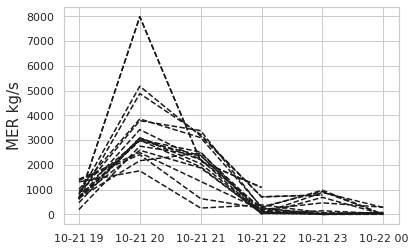

In [15]:
%autoreload
# creates emit-times, CONTROL and SETUP files for HYSPLIT runs.
# Note that warning that meteorological files not found is ok.

%autoreload
print('here')
tiilist = [[2,3],[2,3,4],[2,3,4,5],[2,3,4,5,6],[2,3,4,5,6,7],[2,3,4,5,6,7,8],[2,3,4,5,6,7,8,9],
           [2,3,4,5,6,7,8,9,10],[2,3,4,5,6,7,8,9,10,11]]  #times to assimilate in inversion algorithm.
#tiilist = [[2,3]]
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=7
for tii in tiilist:
    print('tii', tii)
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
    #inverse.make_efile(vloc=vloc)
    #inverse.run_hysplit()


tiilist = [[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11]]
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=7
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
    #inverse.make_efile(vloc=vloc)
    #inverse.run_hysplit()

In [16]:
inverse.invlist

In [17]:
for tii in [1,2,3,4,5,6,7,8,9,10,11]:
    print('time {} : {}'.format(tii,inverse.invlist[0].get_time(tii)))


time 1 : 2020-10-21 20:00:00
time 2 : 2020-10-21 21:00:00
time 3 : 2020-10-21 22:00:00
time 4 : 2020-10-21 23:00:00
time 5 : 2020-10-22 00:00:00
time 6 : 2020-10-22 01:00:00
time 7 : 2020-10-22 02:00:00
time 8 : 2020-10-22 03:00:00
time 9 : 2020-10-22 04:00:00
time 10 : 2020-10-22 05:00:00
time 11 : 2020-10-22 06:00:00


In [18]:
%autoreload
inverse.invlist[0].print_summary()

Observations availalbe in volcat_avg_hash
dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
times in cdump file
2020 10 21 19:00z
2020 10 21 20:00z
2020 10 21 21:00z
2020 10 21 22:00z
2020 10 21 23:00z
2020 10 22 00:00z
2020 10 22 01:00z
2020 10 22 02:00z
2020 10 22 03:00z
2020 10 22 04:00z
2020 10 22 05:00z
2020 10 22 06:00z
2020 10 22 07:00z
2020 10 22 08:00z
2020 10 22 09:00z
2020 10 22 10:00z
2020 10 22 11:00z


4 bezyC
tii 4


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


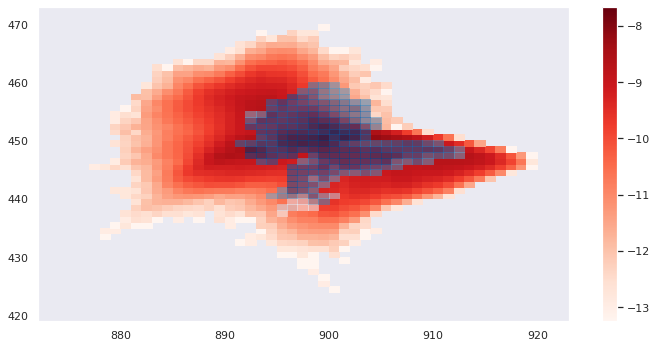

In [19]:
%autoreload
#gep10, gep16 looks good at tii=6.
#gep24 possibly looks ok.
zlevel=None  #index 'ensemble'
           #if None then sum along the ens. dimension which shows contributions from all inv. runs.
tii=4
#zlevel=None
%autoreload
ax = inverse.compare_plotsA(daterange=dlist[0],tii=tii,zii=zlevel)
#plt.gca()
#ax.plot(160.587,55.978,'y^')
#plt.show()


In [20]:
%autoreload
inverse.set_concmult(1)

In [21]:
def makerun(tii,remove_cols, remove_rows, remove_sources,remove_ncs):
    inverse.make_tcm_mult(tii,remove_cols=remove_cols, remove_rows=remove_rows, remove_sources=remove_sources,remove_ncs=remove_ncs)
    runtag = ai.create_runtag(tag,tii,remove_cols, remove_rows, remove_sources,remove_ncs=remove_ncs)
    inverse.set_subdirectory(runtag)
    tcmstr = inverse.write_tcm(os.path.join(inverse.subdir, tcm_name_base.replace('zzz','4')))
    inverse.run_tcm()
    
    eii=None
    unit='g/h'
    unit='kg/s'
    inverse.plot_outdat_ts(eii,unit=unit)
    #plt.show()
    #inverse.plot_outdat_ts(eii,profile=True)
    inverse.save_emis(runtag+'.csv')

tii [2, 3]
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1093: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this,

bezyC
length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_TFw5
saving emissions in  /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_TFw5/RunC_2_3_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_TFw5/RunC_2_3_TFw5.csv
working on  0 1
using particle size  None
ZZZZ


AttributeError: 'NoneType' object has no attribute 'keys'

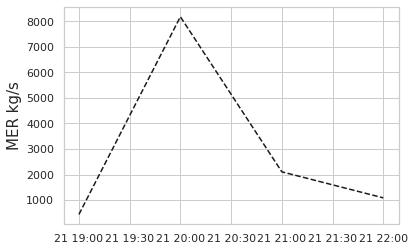

In [40]:
%autoreload
# creates emit-times, CONTROL and SETUP files for HYSPLIT runs.
# Note that warning that meteorological files not found is ok.

%autoreload

tiilist = [[2,3],[2,3,4],[2,3,4,5],[2,3,4,5,6],[2,3,4,5,6,7],[2,3,4,5,6,7,8],[2,3,4,5,6,7,8,9],
           [2,3,4,5,6,7,8,9,10],[2,3,4,5,6,7,8,9,10,11]]  #times to assimilate in inversion algorithm.
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=5
for tii in tiilist:
    print('tii', tii)
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
    inverse.make_efile(vloc=vloc)
    inverse.run_hysplit()

tiilist = [[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11]]
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=5
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
    inverse.make_efile(vloc=vloc)
    inverse.run_hysplit()

In [ ]:
%autoreload
tiilist = [[2,3],[2,3,4],[4,5,6]]  #times to assimilate in inversion algorithm.
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=5
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
remove_rows=True
remove_ncs=0
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
remove_rows=False
remove_ncs=0
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
    
    
tiilist = [[7,8],[9,10,11],[2,3,4,5,6,7,8,9,10,11]]  #times to assimilate in inversion algorithm.
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=7
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
remove_rows=True
remove_ncs=0
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
remove_rows=False
remove_ncs=0
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)  
    

In [24]:
%autoreload
tii = [2,3]  #times to assimilate in inversion algorithm.
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=5
#remove_sources = ['12880']  # this would remove top vertical level from consideration.
#inverse.make_tcm_mult([1,2,3,4],remove_cols=True,remove_rows=False,remove_sources=['12880'])
inverse.make_tcm_mult(tii,remove_cols=remove_cols, remove_rows=remove_rows, remove_sources=remove_sources,remove_ncs=remove_ncs)
runtag = ai.create_runtag(tag,tii,remove_cols, remove_rows, remove_sources,remove_ncs=remove_ncs)

# set the subdirectory for this TCM run.
#subdir = inverse.set_sub_directory(runtag)
#print('setting subdirectory {}'.format(subdir))

2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1093: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this,

In [25]:
print(runtag)

RunC_2_3_TFw5


In [26]:
numpar = 20000  # number of particles released per hour.
delt = 5 # time step
tave = 1 # 1 h time average
hres = 0.1 # 0.1 degree horizontal resolution.
rate = 1 # 1 unit mass per hour
particle_mass = rate / numpar  #how much unit mass each particle has
area = (hres * 111e3)**2  # area in meters squared for mass loading grid.
mass_one = particle_mass / area  # unit mass / m2 for one particle in grid box.
mass_one_one = mass_one / (tave*60 / delt)  # smallest mass loading possible with one particle for one time step
print(mass_one_one)  # one particle for one time step
print(mass_one)      # one particle in area.

3.381760138516895e-14
4.0581121662202745e-13


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1256: RuntimeWarning: divide by zero encountered in log10
  cb = plt.pcolormesh(np.log10(self.tcm),cmap='tab20')


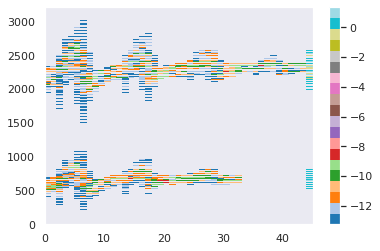

(3214, 45)

In [27]:
%autoreload
inverse.plot_tcm()
inverse.invlist[0].tcm.shape


In [28]:
#hysplitdir = '/hysplit-users/alicec/FBamcArea/exec/'
#inverse.set_directory(wdir,execdir,hysplitdir)
inverse.set_subdirectory(runtag)

'/hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_TFw5'

In [29]:
%autoreload
tcmstr = inverse.write_tcm(os.path.join(inverse.subdir, tcm_name_base.replace('zzz','4')))
#print(tcmstr)

In [30]:
%autoreload
#hysplitdir = '/hysplit-users/alicec/FBamcArea/exec/'
#inverse.set_directory(wdir,execdir,hysplitdir)
inverse.run_tcm()

bezyC


In [31]:
# Now run the inverse model.

# open the Parameters_in.dat file and set N_ctrl, Nx_ctrl and lbfgs_nbd to
# the number shown for N_ctrl above.

# copy the tcm file to TCM_sum.csv

# run new_lbfgsb.x

bezyC


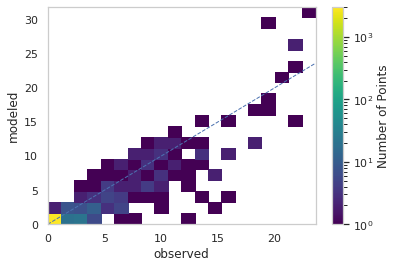

In [32]:
%autoreload
inverse.plot_outdat(eii=None)

In [33]:
print(inverse.make_tcm_names())
print(inverse.subdir)

(['bezyC_out.dat'], ['bezyC_out2.dat'])
/hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_TFw5


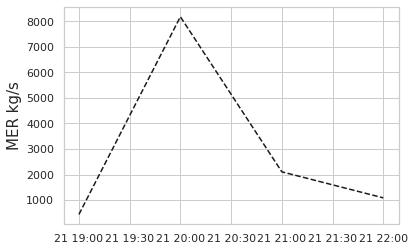

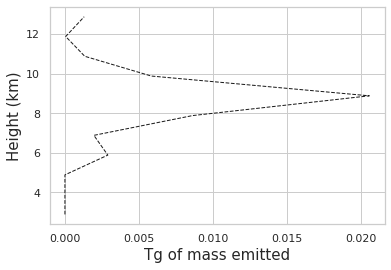

In [34]:
%autoreload

eii=None
unit='g/h'
unit='kg/s'
inverse.plot_outdat_ts(eii,unit=unit)
plt.show()
inverse.plot_outdat_ts(eii,unit=unit,profile=True)
#ax = plt.gca()
#ax.set_ylim(0,10000)

In [35]:
#%autoreload
#inverse.sourcehash = ai.get_sourcehash(configdir,configfile)

bezyC


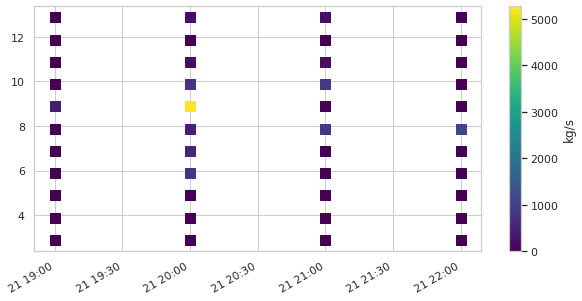

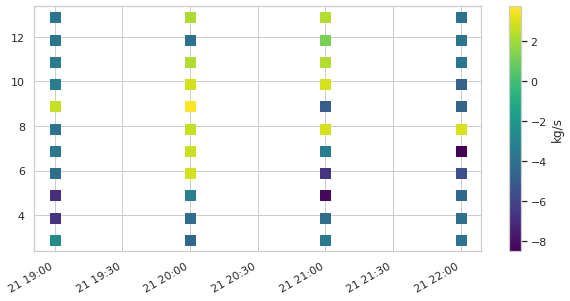

In [36]:
%autoreload
unit='kg/s'
#unit='g/h'
iii=0
print(inverse.taglist[iii])
ilist =  inverse.read_outdat()
df = ilist[iii].get_emis()
vals = inverse.invlist[iii].make_outdat(df)
inverse.invlist[iii].plot_outdat(vals,log=False,cmap='viridis',unit=unit)
#plt.savefig('{}.emissions_log.png'.format(figbase))
plt.show()
inverse.invlist[0].plot_outdat(vals,log=True,cmap='viridis',unit=unit)
#plt.savefig('{}.emissions.png'.format(figbase))


In [37]:
inverse.invlist[0].inp

{'HYSPLIT_DIR': '/hysplit-users/alicec/hysplit.v5.1.0/',
 'MAP_DIR': '/hysplit-users/alicec/hysplit.v5.0.0/graphics/',
 'WORK_DIR': '/hysplit-users/alicec/tmp/RunC/',
 'CONVERT_EXE': 'convert',
 'PYTHON_EXE': '/hysplit-users/alicec/anaconda3/envs/hysplit/bin/python',
 'forecastDirectory': '/pub/forecast',
 'archivesDirectory': '/pub/archives',
 'GHOSTSCRIPT_EXE': 'gs',
 'DATA_DIR': '/hysplit-users/alicec/utilhysplit/utilvolc/ashapp/',
 'owner': 'A. Person',
 'VolcanoName': 'Bezymianny',
 'area': 314000000.0,
 'top': 12880.0,
 'bottom': 2880.0,
 'start_date': datetime.datetime(2020, 10, 21, 19, 0),
 'durationOfSimulation': 12.0,
 'testminutes': 0.0,
 'emissionHours': 6.0,
 'meteorologicalData': 'GFS0p25',
 'EruptionSize': 0.0,
 'latitude': 55.978,
 'longitude': 160.587,
 'samplingIntervalHours': 1.0,
 'eflag': 0.0,
 'source_type': 'uniform',
 'jobname': 'ashtest',
 'runflag': 'inverse',
 'timeres': 1,
 'rate': 1,
 'gisOption': 3,
 'zoomFactor': 50,
 'generatingPostscript': True,
 'gener

In [38]:
%autoreload
inverse.print_directories()

Working directory, wdir :/hysplit-users/alicec/projects/bezy/RunC
execdir :/hysplit-users/alicec/projects/bezy/Inverse_240
hysplitdir :/hysplit-users/alicec/projects/bezy/hysplit
subdir :/hysplit-users/alicec/projects/bezy/RunC/RunC_2_3_TFw5
vdir :/hysplit-users/alicec/projects/bezy/data/volcat
datadir :/hysplit-users/alicec/projects/bezy/data


In [39]:
%autoreload
# creates emit-times, CONTROL and SETUP files for HYSPLIT runs.
# Note that warning that meteorological files not found is ok.
inverse.make_efile(vloc=vloc)

working on  0 1
using particle size  None
ZZZZ


AttributeError: 'NoneType' object has no attribute 'keys'

In [ ]:
%autoreload
inverse.run_hysplit()

# Creating netcdf files from cdump

In [ ]:
runtag = 'RunB_5_TT'
runtag = 'RunB_2_3_4_TF'
runtag = 'RunB_2_3_4_TT'
runtag = 'RunB_7_TT'
inverse.set_subdirectory(runtag)

In [ ]:
%autoreload
# converts cdump to netcdf file.
#dset = inverse.create_emit_output(inverse.subdir + '/Run{}.nc'.format(tag))

In [ ]:
#for attr in dset.attrs: print(type(dset.attrs[attr]), attr)

# Comparing results from different Inversions

In [ ]:
print(inverse.make_tcm_names())
print(inverse.subdir)
print(inverse.wdir)

In [ ]:
type(inverse)

In [ ]:
ilist = inverse.read_outdat(0)
df = ilist[0].get_emis()
df = inverse.invlist[0].make_outdat_df(df)
df.sum(axis=1)

In [ ]:
%autoreload
clrlist = []
runtag=[]
runtag2 = []
clrlist2 = []
#runtag = ['RunB_5_TT']
#clrlist.append('-b')

# green is all different time periods up to 7/8 and using
# a window.
runtag.append('RunB_2_3_4_5_6_7_8_TFw5')
clrlist.append('--go')
runtag.append('RunB_2_3_4_5_TFw5')
clrlist.append('--g')
runtag.append('RunB_2_3_4_TFw5')
clrlist.append('--g')

runtag.append('RunB_4_5_6_TFw5')
clrlist.append('-g')
runtag.append('RunB_7_8_TFw5')
clrlist.append('-go')
runtag.append('RunB_7_8_TFw7')
clrlist.append('-g.')

runtag.append('RunB_9_10_11_TFw7')
clrlist.append('-g^')



# Red : keeping all clear sky values
# this one has higher emissions
runtag.append('RunB_2_3_4_TF')
clrlist.append('--r')
# the rest have lower emissions.
runtag.append('RunB_4_5_6_TF')
clrlist.append('-r^')
runtag.append('RunB_2_3_4_5_TF')
clrlist.append('-r.')
runtag.append('RunB_7_8_TF')
clrlist.append('-ro')
runtag.append('RunB_5_TF')
clrlist.append('-r')
runtag.append('RunB_7_TF')
clrlist.append('-r')

# black : removing all clear sky values
runtag.append('RunB_2_3_4_TT')
clrlist.append('--k')
runtag.append('RunB_2_3_4_5_TT')
clrlist.append('--k.')

runtag.append('RunB_4_5_6_TT')
clrlist.append('-k.')
# later time period
runtag.append('RunB_7_8_TT')
clrlist.append('-ko')



use_tt=False
if use_tt:
    runtag.append('RunB_2_3_4_TT')
    clrlist.append('--k')
    runtag.append('RunB_7_TT')
    clrlist.append('-k')
    # these both try to use emissions earlier in the time period.
    runtag.append('RunB_5_6_7_TT')
    clrlist.append('-k.')
    runtag.append('RunB_2_3_4_5_6_TT')
    clrlist.append('-k')

use_xtra=False
if use_xtra:
    runtag.append('RunB_3_TT')
    clrlist.append('--m')
    runtag.append('RunB_4_TT')
    clrlist.append('--mo')
    runtag.append('RunB_3_TF')
    clrlist.append('-m')

fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
    
for iii, subdir in enumerate(runtag):
    inverse.set_subdirectory(subdir)
    #print(clrlist[iii])
    inverse.plot_outdat_ts(ax=ax,clr=clrlist[iii])
fig.autofmt_xdate()
plt.show()
print('here')
#for iii, subdir in enumerate(runtag2):
#    inverse.set_subdirectory(subdir)
    #print(clrlist2[iii])
#    inverse.plot_outdat_ts(clr=clrlist2[iii])
#plt.show()

fig2 = plt.figure(2)
ax2 = fig.add_subplot(1,1,1)
    
for iii, subdir in enumerate(runtag):
    inverse.set_subdirectory(subdir)
    #print(clrlist2[iii])
    inverse.plot_outdat_ts(clr=clrlist[iii],profile=True,ax=ax2)
plt.show()
    

# Creating netcdf file from the RunB cdump outputs.

In [ ]:
runtag

In [ ]:
blist = []
for iii, subdir in enumerate(runtag):
    #print(subdir)
    inverse.set_subdirectory(subdir)
    #print(inverse.subdir)
    if os.path.isfile(os.path.join(inverse.subdir,'cdump.bezyB')):
       blist.append([os.path.join(inverse.subdir,'cdump.bezyB'),'gfs0p25',subdir])
       print('-------------------', subdir)
dset = hysplit.combine_dataset(blist)

    

In [ ]:
dset

In [ ]:
dset.ens.values
dset.to_netcdf(os.path.join(inverse.wdir,'RunB2.nc'))

In [ ]:
%autoreload
unit='kg/s'
#unit='g/h'
iii=0
print(inverse.taglist[iii])
ilist =  inverse.read_outdat()
df = ilist[iii].get_emis()
vals = inverse.invlist[iii].make_outdat(df)
inverse.invlist[iii].plot_outdat(vals,log=False,cmap='viridis',unit=unit)
#plt.savefig('{}.emissions_log.png'.format(figbase))
plt.show()
inverse.invlist[0].plot_outdat(vals,log=True,cmap='viridis',unit=unit)
#plt.savefig('{}.emissions.png'.format(figbase))

In [ ]:
v8, c8 = inverse.invlist[0].get_pair(4)

In [ ]:
v8.plot.pcolormesh()

In [ ]:
spread=4
test = v8.rolling(x=spread,center=True).max()
test = test.rolling(y=spread,center=True).max()
test.plot.pcolormesh()

In [ ]:
test1 = xr.where(test>0,True,False)
test2 = xr.where(v8>0,True,False)

In [ ]:
test1

In [ ]:
np.all([test1,test2],axis=0).shape

In [ ]:
test3 = xr.where(np.any([test1,test2],axis=0), v8, -1)

In [ ]:
test3.plot.pcolormesh()